In [12]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
plt.style.use('fivethirtyeight')
import time
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
csv = '/content/drive/My Drive/tweets/cleaned.csv'
my_df = pd.read_csv(csv,index_col=0)
my_df.head()

/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,text,target
0,awww that bummer you shoulda got david carr of...,0
1,is upset that he can not update his facebook b...,0
2,dived many times for the ball managed to save ...,0
3,my whole body feels itchy and like its on fire,0
4,no it not behaving at all mad why am here beca...,0


In [0]:
x=my_df.text
y=my_df.target

In [0]:
from sklearn.model_selection import train_test_split
SEED = 2000
x_train, x_validation_and_test, y_train, y_validation_and_test = train_test_split(x, y, test_size=.02, random_state=SEED)
x_validation, x_test, y_validation, y_test = train_test_split(x_validation_and_test, y_validation_and_test, test_size=.5, random_state=SEED)


In [0]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from time import time

In [0]:
def accuracy_summary(pipeline, x_train, y_train, x_test, y_test):
    if len(x_test[y_test == 0]) / (len(x_test)*1.) > 0.5:
        null_accuracy = len(x_test[y_test == 0]) / (len(x_test)*1.)
    else:
        null_accuracy = 1. - (len(x_test[y_test == 0]) / (len(x_test)*1.))
    t0 = time.clock()
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred = sentiment_fit.predict(x_test)
    train_test_time = time.clock() - t0
    accuracy = accuracy_score(y_test, y_pred)
    print ("null accuracy: {0:.2f}%".format(null_accuracy*100))
    print ("accuracy score: {0:.2f}%".format(accuracy*100))
    if accuracy > null_accuracy:
        print ("model is {0:.2f}% more accurate than null accuracy".format((accuracy-null_accuracy)*100))
    elif accuracy == null_accuracy:
        print ("model has the same accuracy with the null accuracy")
    else:
        print ("model is {0:.2f}% less accurate than null accuracy".format((null_accuracy-accuracy)*100))
    print ("train and test time: {0:.2f}s".format(train_test_time))
    print ("-"*80)
    return accuracy, train_test_time

In [0]:
cvec = CountVectorizer()
lr = LogisticRegression()
n_features = np.arange(10000,100001,10000)

In [0]:
def nfeature_accuracy_checker(vectorizer=cvec, n_features=n_features, stop_words=None, ngram_range=(1, 1), classifier=lr):
    result = []
    print (classifier)
    print ("\n")
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        print ("Validation result for {} features".format(n))
        nfeature_accuracy,tt_time = accuracy_summary(checker_pipeline, x_train, y_train, x_validation, y_validation)
        result.append((n,nfeature_accuracy,tt_time))
    return result

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
tvec = TfidfVectorizer()

In [14]:
tic = time.clock()
print ("RESULT FOR UNIGRAM WITH STOP WORDS (Tfidf)\n")
feature_result_tgt = nfeature_accuracy_checker(vectorizer=tvec,ngram_range=(1, 1),stop_words='english')
toc = time.clock()
print ("complete train and test time: {0:.2f}s".format(toc-tic))

RESULT FOR UNIGRAM WITH STOP WORDS (Tfidf)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


Validation result for 10000 features


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


null accuracy: 50.06%
accuracy score: 77.27%
model is 27.21% more accurate than null accuracy
train and test time: 81.71s
--------------------------------------------------------------------------------
Validation result for 20000 features
null accuracy: 50.06%
accuracy score: 77.60%
model is 27.55% more accurate than null accuracy
train and test time: 71.07s
--------------------------------------------------------------------------------
Validation result for 30000 features
null accuracy: 50.06%
accuracy score: 77.81%
model is 27.75% more accurate than null accuracy
train and test time: 63.91s
--------------------------------------------------------------------------------
Validation result for 40000 features
null accuracy: 50.06%
accuracy score: 77.87%
model is 27.81% more accurate than null accuracy
train and test time: 93.00s
--------------------------------------------------------------------------------
Validation result for 50000 features
null accuracy: 50.06%
accuracy score: 77

In [0]:
tic = time.clock()
print ("RESULT FOR UNIGRAM WITH STOP WORDS (Tfidf)\n")
feature_result_ugt = nfeature_accuracy_checker(vectorizer=tvec)
toc = time.clock()
print ("complete train and test time: {0:.2f}s".format(toc-tic))

RESULT FOR UNIGRAM WITH STOP WORDS (Tfidf)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


Validation result for 10000 features


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


null accuracy: 50.06%
accuracy score: 80.03%
model is 29.97% more accurate than null accuracy
train and test time: 63.16s
--------------------------------------------------------------------------------
Validation result for 20000 features
null accuracy: 50.06%
accuracy score: 80.39%
model is 30.33% more accurate than null accuracy
train and test time: 68.87s
--------------------------------------------------------------------------------
Validation result for 30000 features
null accuracy: 50.06%
accuracy score: 80.43%
model is 30.37% more accurate than null accuracy
train and test time: 82.80s
--------------------------------------------------------------------------------
Validation result for 40000 features
null accuracy: 50.06%
accuracy score: 80.47%
model is 30.41% more accurate than null accuracy
train and test time: 97.86s
--------------------------------------------------------------------------------
Validation result for 50000 features
null accuracy: 50.06%
accuracy score: 80

In [0]:
tic = time.clock()
print ("RESULT FOR BIGRAM WITHOUT STOP WORDS (Tfidf)\n")
feature_result_bgt = nfeature_accuracy_checker(vectorizer=tvec,ngram_range=(1, 2))
toc = time.clock()
print ("complete train and test time: {0:.2f}s".format(toc-tic))


RESULT FOR BIGRAM WITH STOP WORDS (Tfidf)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


Validation result for 10000 features


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


null accuracy: 50.06%
accuracy score: 80.90%
model is 30.84% more accurate than null accuracy
train and test time: 127.29s
--------------------------------------------------------------------------------
Validation result for 20000 features
null accuracy: 50.06%
accuracy score: 81.66%
model is 31.61% more accurate than null accuracy
train and test time: 122.24s
--------------------------------------------------------------------------------
Validation result for 30000 features
null accuracy: 50.06%
accuracy score: 81.96%
model is 31.91% more accurate than null accuracy
train and test time: 131.53s
--------------------------------------------------------------------------------
Validation result for 40000 features
null accuracy: 50.06%
accuracy score: 82.13%
model is 32.08% more accurate than null accuracy
train and test time: 155.62s
--------------------------------------------------------------------------------
Validation result for 50000 features
null accuracy: 50.06%
accuracy score

In [0]:
tic = time.clock()
print ("RESULT FOR TRIGRAM WITH STOP WORDS (Tfidf)\n")
feature_result_tgt = nfeature_accuracy_checker(vectorizer=tvec,ngram_range=(1, 3))
toc = time.clock()
print ("complete train and test time: {0:.2f}s".format(toc-tic))

RESULT FOR TRIGRAM WITH STOP WORDS (Tfidf)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


Validation result for 10000 features


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


null accuracy: 50.06%
accuracy score: 81.06%
model is 31.00% more accurate than null accuracy
train and test time: 204.18s
--------------------------------------------------------------------------------
Validation result for 20000 features
null accuracy: 50.06%
accuracy score: 81.63%
model is 31.57% more accurate than null accuracy
train and test time: 206.74s
--------------------------------------------------------------------------------
Validation result for 30000 features
null accuracy: 50.06%
accuracy score: 81.89%
model is 31.83% more accurate than null accuracy
train and test time: 222.41s
--------------------------------------------------------------------------------
Validation result for 40000 features
null accuracy: 50.06%
accuracy score: 82.06%
model is 32.01% more accurate than null accuracy
train and test time: 237.46s
--------------------------------------------------------------------------------
Validation result for 50000 features
null accuracy: 50.06%
accuracy score

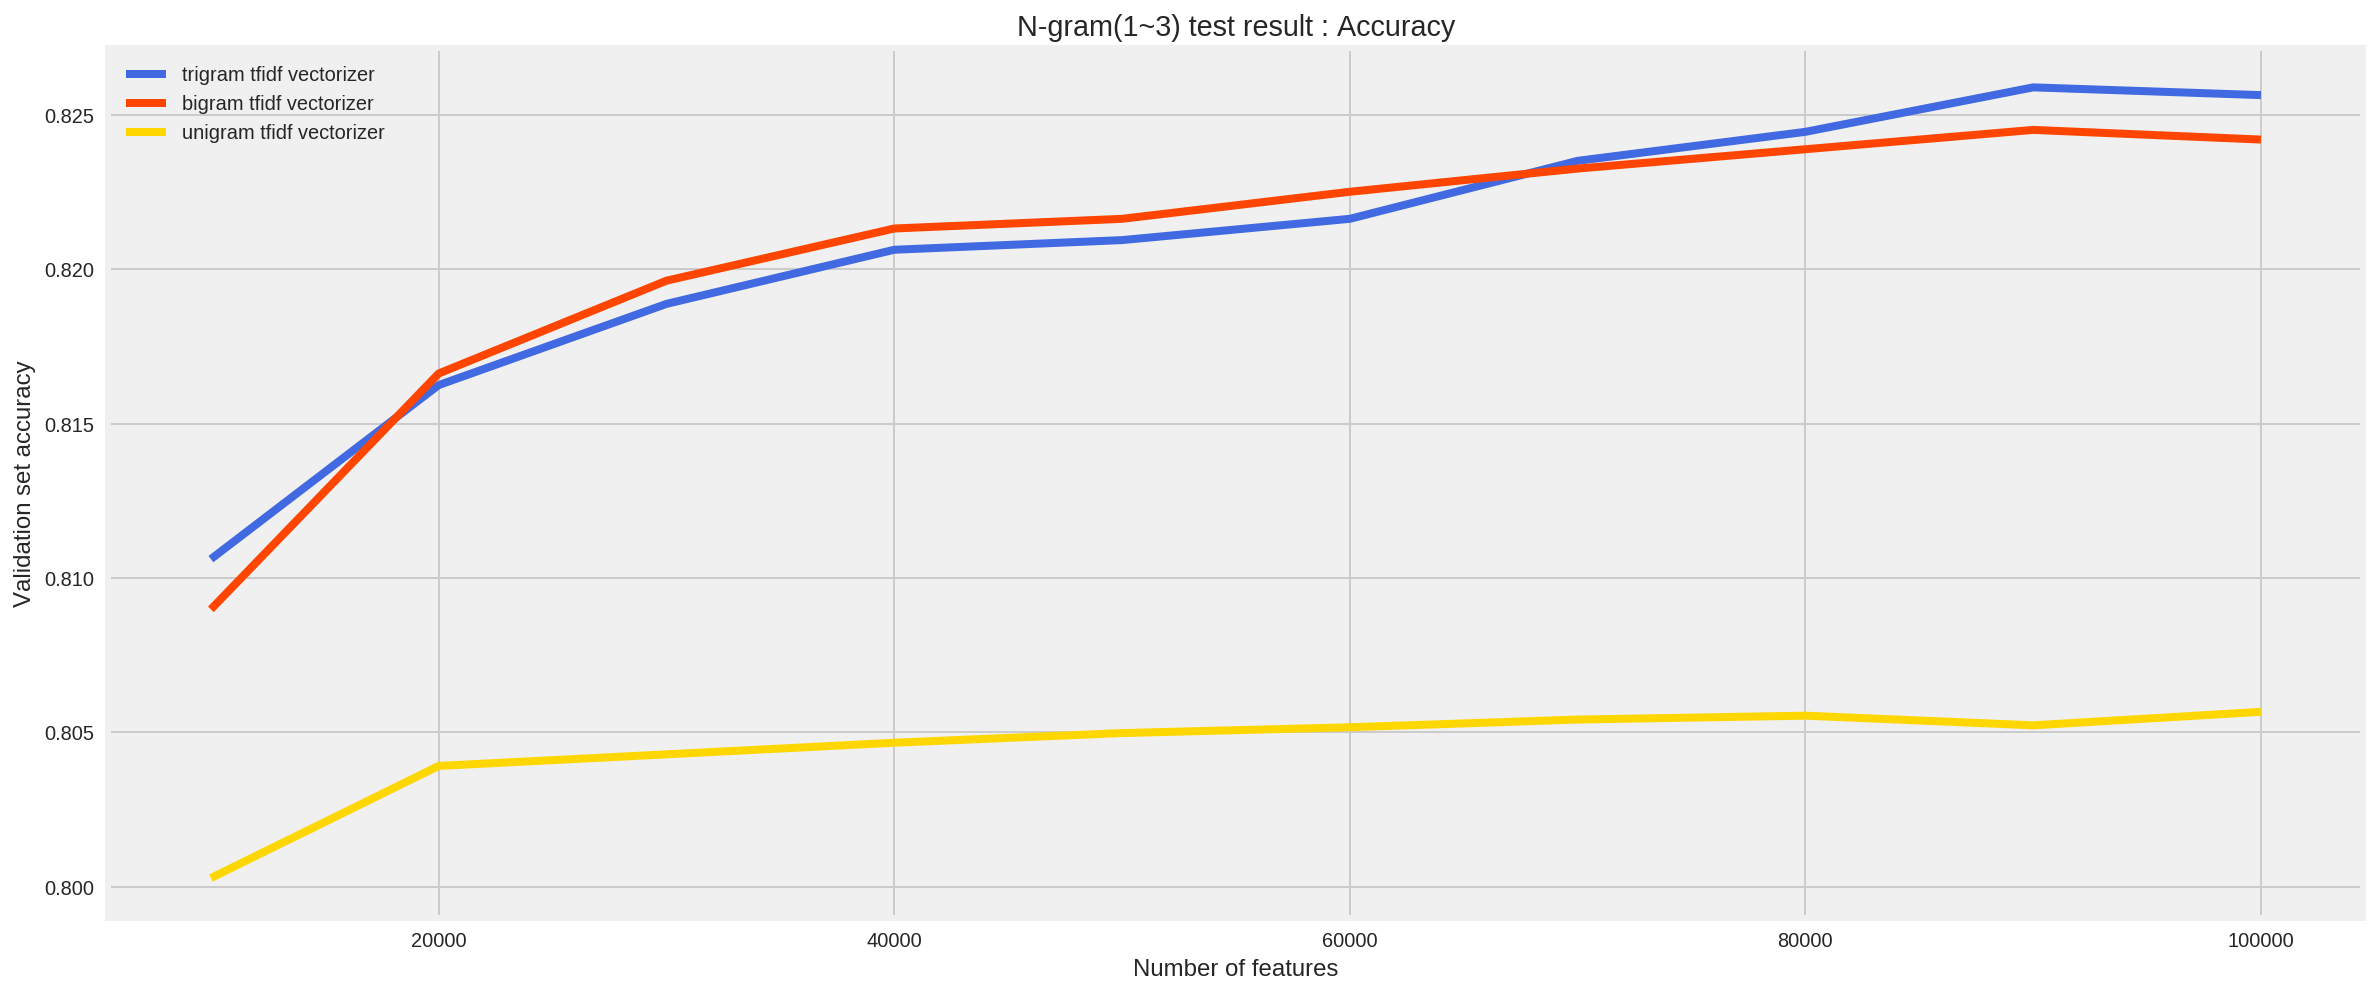

In [0]:
nfeatures_plot_tgt = pd.DataFrame(feature_result_tgt,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_bgt = pd.DataFrame(feature_result_bgt,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ugt = pd.DataFrame(feature_result_ugt,columns=['nfeatures','validation_accuracy','train_test_time'])

plt.figure(figsize=(18,8))

plt.plot(nfeatures_plot_tgt.nfeatures, nfeatures_plot_tgt.validation_accuracy,label='trigram tfidf vectorizer',color='royalblue')
#plt.plot(nfeatures_plot_tg.nfeatures, nfeatures_plot_tg.validation_accuracy,label='trigram count vectorizer',linestyle=':', color='royalblue')
plt.plot(nfeatures_plot_bgt.nfeatures, nfeatures_plot_bgt.validation_accuracy,label='bigram tfidf vectorizer',color='orangered')
#plt.plot(nfeatures_plot_bg.nfeatures, nfeatures_plot_bg.validation_accuracy,label='bigram count vectorizer',linestyle=':',color='orangered')
plt.plot(nfeatures_plot_ugt.nfeatures, nfeatures_plot_ugt.validation_accuracy, label='unigram tfidf vectorizer',color='gold')
#plt.plot(nfeatures_plot_ug.nfeatures, nfeatures_plot_ug.validation_accuracy, label='unigram count vectorizer',linestyle=':',color='gold')
plt.title("N-gram(1~3) test result : Accuracy")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")
plt.legend()

**Algorithms Comparison**

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.neighbors import NearestCentroid
from sklearn.feature_selection import SelectFromModel

In [0]:
names = ["Logistic Regression", "Linear SVC", "LinearSVC with L1-based feature selection","Multinomial NB", 
         "Bernoulli NB", "Ridge Classifier", "AdaBoost", "Perceptron","Passive-Aggresive", "Nearest Centroid"]
classifiers = [
    LogisticRegression(),
    LinearSVC(),
    Pipeline([
  ('feature_selection', SelectFromModel(LinearSVC(penalty="l1", dual=False))),
  ('classification', LinearSVC(penalty="l2"))]),
    MultinomialNB(),
    BernoulliNB(),
    RidgeClassifier(),
    AdaBoostClassifier(),
    Perceptron(),
    PassiveAggressiveClassifier(),
    NearestCentroid()
    ]
zipped_clf = zip(names,classifiers)


**Algorithm appliance function**

In [0]:
tvec = TfidfVectorizer()
def classifier_comparator(vectorizer=tvec, n_features=10000, stop_words=None, ngram_range=(1, 1), classifier=zipped_clf):
    result = []
    vectorizer.set_params(stop_words=stop_words, max_features=n_features, ngram_range=ngram_range)
    for n,c in classifier:
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', c)
        ])
        print ("Validation result for {}".format(n))
        print (c)
        clf_accuracy,tt_time = accuracy_summary(checker_pipeline, x_train, y_train, x_validation, y_validation)
        result.append((n,clf_accuracy,tt_time))
    return result

In [19]:
%%time
trigram_result = classifier_comparator(n_features=100000,ngram_range=(1,3))


Validation result for Logistic Regression
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


null accuracy: 50.06%
accuracy score: 82.56%
model is 32.51% more accurate than null accuracy
train and test time: 256.96s
--------------------------------------------------------------------------------
Validation result for Linear SVC
LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)
null accuracy: 50.06%
accuracy score: 81.95%
model is 31.89% more accurate than null accuracy
train and test time: 220.25s
--------------------------------------------------------------------------------
Validation result for LinearSVC with L1-based feature selection
Pipeline(memory=None,
     steps=[('feature_selection', SelectFromModel(estimator=LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=None, tol=0.0001

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


null accuracy: 50.06%
accuracy score: 76.59%
model is 26.54% more accurate than null accuracy
train and test time: 180.86s
--------------------------------------------------------------------------------
Validation result for Passive-Aggresive
PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
              early_stopping=False, fit_intercept=True, loss='hinge',
              max_iter=None, n_iter=None, n_iter_no_change=5, n_jobs=None,
              random_state=None, shuffle=True, tol=None,
              validation_fraction=0.1, verbose=0, warm_start=False)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


null accuracy: 50.06%
accuracy score: 79.36%
model is 29.30% more accurate than null accuracy
train and test time: 183.06s
--------------------------------------------------------------------------------
Validation result for Nearest Centroid
NearestCentroid(metric='euclidean', shrink_threshold=None)
null accuracy: 50.06%
accuracy score: 72.81%
model is 22.75% more accurate than null accuracy
train and test time: 178.69s
--------------------------------------------------------------------------------
CPU times: user 51min 46s, sys: 18.6 s, total: 52min 4s
Wall time: 52min 3s


In [41]:
trigram_result

[('Logistic Regression', 0.8256484149855908, 256.96066099999996),
 ('Linear SVC', 0.8195088334795139, 220.24951099999998),
 ('LinearSVC with L1-based feature selection',
  0.8204485653426888,
  388.7258439999998),
 ('Multinomial NB', 0.8050369627866182, 175.0492529999999),
 ('Bernoulli NB', 0.7927577997744644, 177.68203900000003),
 ('Ridge Classifier', 0.8195088334795139, 232.6682740000001),
 ('AdaBoost', 0.699285803783987, 1130.8600270000002),
 ('Perceptron', 0.7659441172785365, 180.85620999999992),
 ('Passive-Aggresive', 0.7935722340558827, 183.06319600000006),
 ('Nearest Centroid', 0.7281042475880215, 178.69326500000034)]

In [0]:
df = pd.DataFrame(data=trigram_result,columns=['Classifier', 'accuracy', 'time'])
df.accuracy = round(df.accuracy * 100 , 2)
df.time = round(df.time,1)

In [67]:
df.sort_values(by=['accuracy'], ascending=False)

,Classifier,accuracy,time
0,Logistic Regression,82.56,257.0
2,LinearSVC with L1-based feature selection,82.04,388.7
1,Linear SVC,81.95,220.2
5,Ridge Classifier,81.95,232.7
3,Multinomial NB,80.50,175.0
8,Passive-Aggresive,79.36,183.1
4,Bernoulli NB,79.28,177.7
7,Perceptron,76.59,180.9
9,Nearest Centroid,72.81,178.7
6,AdaBoost,69.93,1130.9
